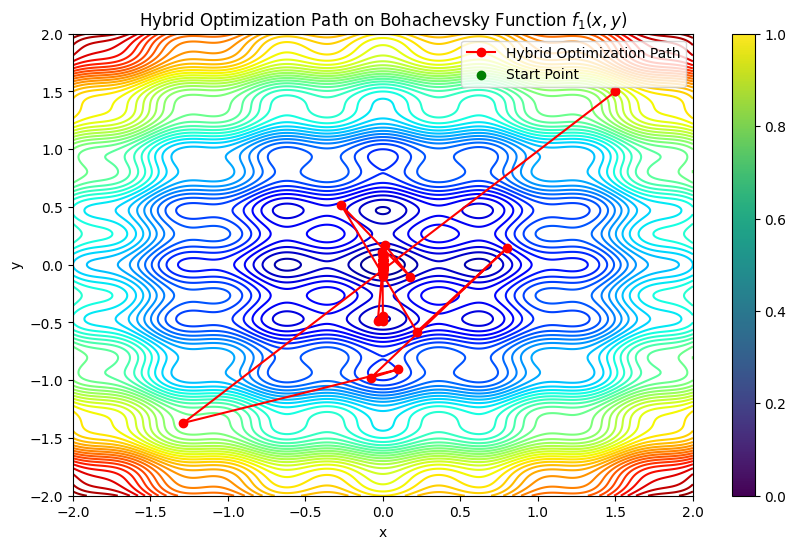

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define Bohachevsky function f1 and its gradient
def f1(x, y):
    return x**2 + 2*y**2 - 0.3*np.cos(3*np.pi*x) - 0.4*np.cos(4*np.pi*y) + 0.7

def grad_f1(x, y):
    df_dx = 2*x + 0.9*np.pi*np.sin(3*np.pi*x)
    df_dy = 4*y + 1.6*np.pi*np.sin(4*np.pi*y)
    return np.array([df_dx, df_dy])

def hessian_f1(x, y):
    d2f_dx2 = 2 + 2.7*(np.pi**2)*np.cos(3*np.pi*x)
    d2f_dy2 = 4 + 6.4*(np.pi**2)*np.cos(4*np.pi*y)
    d2f_dxdy = 0
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

# Armijo's rule for backtracking line search
def armijo_rule(f, grad_f, x, p, alpha=0.4, beta=0.9, sigma=1e-4):
    t = 1.0
    fx = f(x[0], x[1])
    grad_fx = grad_f(x[0], x[1])
    while f(x[0] + t * p[0], x[1] + t * p[1]) > fx + sigma * t * np.dot(grad_fx, p):
        t *= beta
    return t

# Hybrid optimization algorithm
def hybrid_optimization(f, grad_f, hessian_f, x0, tol=1e-6, max_iter=1000):
    x = np.array(x0)
    path = [x.copy()]
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        if np.linalg.norm(grad) < tol:
            break
        if i < 100:  # Use steepest descent method initially
            p = -grad
        else:  # Switch to Newton's method
            H = hessian_f(x[0], x[1])
            try:
                p = -np.linalg.inv(H).dot(grad)
            except np.linalg.LinAlgError:
                p = -grad
        t = armijo_rule(f, grad_f, x, p)
        x = x + t * p
        path.append(x.copy())
    return np.array(path)

# Initial point
x0 = np.array([1.5, 1.5])

# Perform hybrid optimization
path = hybrid_optimization(f1, grad_f1, hessian_f1, x0)

# Plot the results
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
Z = f1(X, Y)

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.plot(path[:, 0], path[:, 1], 'ro-', label='Hybrid Optimization Path')
plt.scatter(x0[0], x0[1], color='green', label='Start Point')
plt.title('Hybrid Optimization Path on Bohachevsky Function $f_1(x, y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar()
plt.show()


In [29]:
first_idea = path

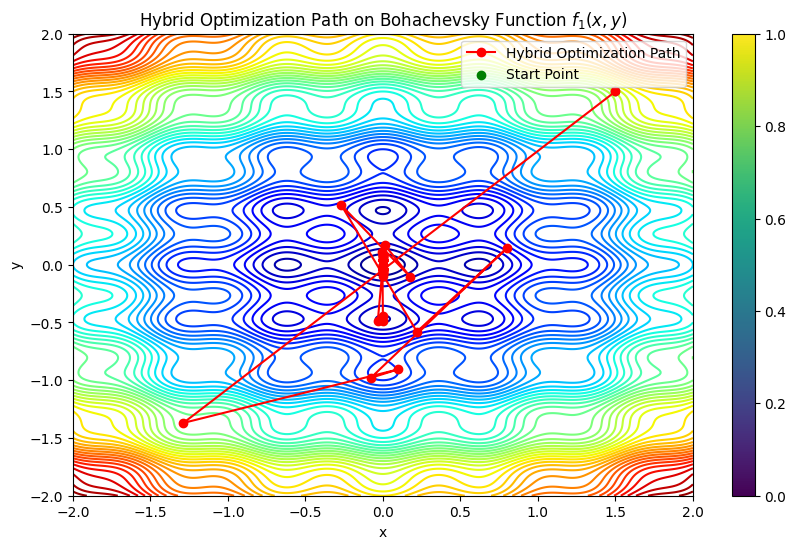

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define Bohachevsky function f1 and its gradient
def f1(x, y):
    return x**2 + 2*y**2 - 0.3*np.cos(3*np.pi*x) - 0.4*np.cos(4*np.pi*y) + 0.7

def grad_f1(x, y):
    df_dx = 2*x + 0.9*np.pi*np.sin(3*np.pi*x)
    df_dy = 4*y + 1.6*np.pi*np.sin(4*np.pi*y)
    return np.array([df_dx, df_dy])

def hessian_f1(x, y):
    d2f_dx2 = 2 + 2.7*(np.pi**2)*np.cos(3*np.pi*x)
    d2f_dy2 = 4 + 6.4*(np.pi**2)*np.cos(4*np.pi*y)
    d2f_dxdy = 0
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

# Armijo's rule for backtracking line search
def armijo_rule(f, grad_f, x, p, alpha=0.4, beta=0.9, sigma=1e-4):
    t = 1.0
    fx = f(x[0], x[1])
    grad_fx = grad_f(x[0], x[1])
    while f(x[0] + t * p[0], x[1] + t * p[1]) > fx + sigma * t * np.dot(grad_fx, p):
        t *= beta
    return t

# Trust region method
def trust_region_step(grad, hess, delta=1.0):
    try:
        p = -np.linalg.inv(hess).dot(grad)
    except np.linalg.LinAlgError:
        p = -grad
    if np.linalg.norm(p) > delta:
        p = delta * p / np.linalg.norm(p)
    return p

# Hybrid optimization algorithm
def hybrid_optimization(f, grad_f, hessian_f, x0, tol=1e-6, max_iter=1000):
    x = np.array(x0)
    path = [x.copy()]
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        if np.linalg.norm(grad) < tol:
            break
        if i < 50:  # Use steepest descent method initially
            p = -grad
            t = armijo_rule(f, grad_f, x, p)
        else:  # Switch to Newton's method with trust region
            hess = hessian_f(x[0], x[1])
            p = trust_region_step(grad, hess)
            t = 1.0
        x = x + t * p
        path.append(x.copy())
    return np.array(path)

# Initial point
x0 = np.array([1.5, 1.5])

# Perform hybrid optimization
path = hybrid_optimization(f1, grad_f1, hessian_f1, x0)

# Plot the results
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
Z = f1(X, Y)

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.plot(path[:, 0], path[:, 1], 'ro-', label='Hybrid Optimization Path')
plt.scatter(x0[0], x0[1], color='green', label='Start Point')
plt.title('Hybrid Optimization Path on Bohachevsky Function $f_1(x, y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar()
plt.show()


In [31]:
second_idea = path

In [39]:
first_idea[-1,:]

array([-1.87267054e-96, -4.33440970e-12])

In [38]:
second_idea[-1,:]

array([ 0.00000000e+00, -1.79142174e-16])

Steepest Descent with Armijo's Rule: Time=0.0141s, Function Evals=157, Gradient Evals=158
Newton's Method with Trust Region: Time=0.0310s, Function Evals=0, Gradient Evals=1000, Hessian Evals=1000
Hybrid Optimization: Time=0.0040s, Function Evals=50, Gradient Evals=54, Hessian Evals=3


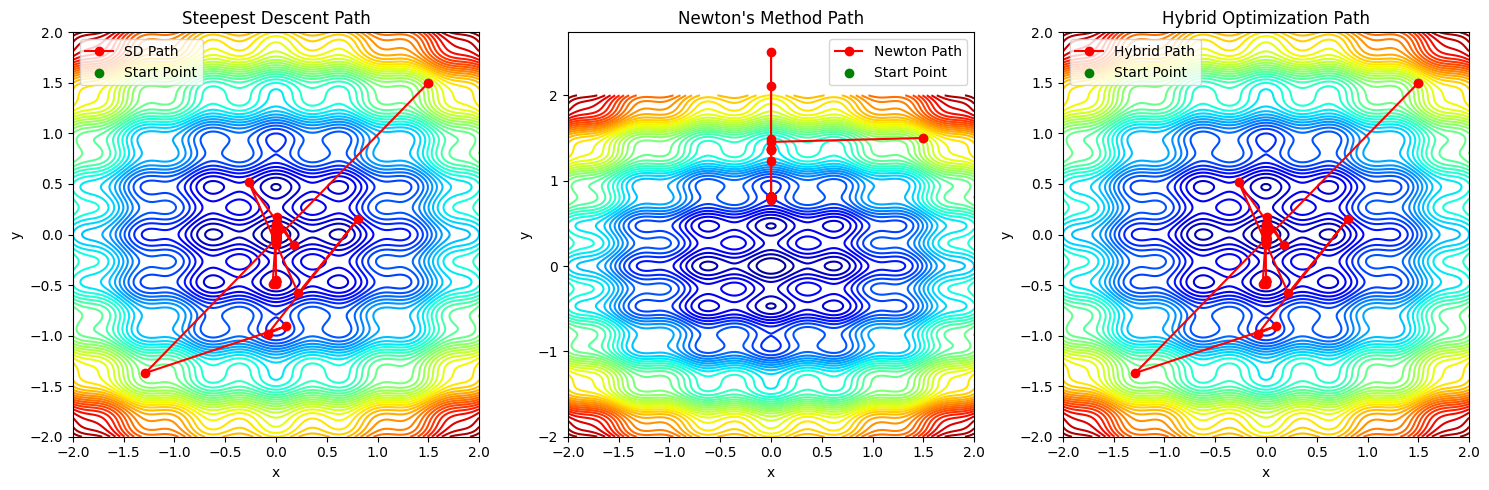

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define Bohachevsky function f1 and its gradient
def f1(x, y):
    return x**2 + 2*y**2 - 0.3*np.cos(3*np.pi*x) - 0.4*np.cos(4*np.pi*y) + 0.7

def grad_f1(x, y):
    df_dx = 2*x + 0.9*np.pi*np.sin(3*np.pi*x)
    df_dy = 4*y + 1.6*np.pi*np.sin(4*np.pi*y)
    return np.array([df_dx, df_dy])

def hessian_f1(x, y):
    d2f_dx2 = 2 + 2.7*(np.pi**2)*np.cos(3*np.pi*x)
    d2f_dy2 = 4 + 6.4*(np.pi**2)*np.cos(4*np.pi*y)
    d2f_dxdy = 0
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

# Armijo's rule for backtracking line search
def armijo_rule(f, grad_f, x, p, epsilon_0=1, beta=0.5, sigma=10^-4):
    epsilon = epsilon_0
    fx = f(x[0], x[1])
    grad_fx = grad_f(x[0], x[1])
    while True:
        print(np.dot(grad_fx, p))
        if f(x[0] + epsilon * p[0], x[1] + epsilon * p[1]) <= fx + sigma * epsilon * np.dot(grad_fx, p):
            break
        epsilon *= beta
    return epsilon

# Trust region method
def trust_region_step(grad, hess, delta=1.0):
    try:
        p = -np.linalg.inv(hess).dot(grad)
    except np.linalg.LinAlgError:
        p = -grad
    if np.linalg.norm(p) > delta:
        p = delta * p / np.linalg.norm(p)
    return p

# Steepest Descent with Armijo's Rule
def steepest_descent_armijo(f, grad_f, x0, tol=1e-6, max_iter=1000):
    x = np.array(x0)
    path = [x.copy()]
    function_evals = 0
    gradient_evals = 0
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        gradient_evals += 1
        if np.linalg.norm(grad) < tol:
            break
        p = -grad
        t = armijo_rule(f, grad_f, x, p)
        function_evals += 1
        x = x + t * p
        path.append(x.copy())
    return np.array(path), function_evals, gradient_evals

# Newton's Method with Trust Region
def newton_trust_region(f, grad_f, hessian_f, x0, tol=1e-6, max_iter=1000):
    x = np.array(x0)
    path = [x.copy()]
    function_evals = 0
    gradient_evals = 0
    hessian_evals = 0
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        gradient_evals += 1
        if np.linalg.norm(grad) < tol:
            break
        hess = hessian_f(x[0], x[1])
        hessian_evals += 1
        p = trust_region_step(grad, hess)
        x = x + (x * p)
        path.append(x.copy())
    return np.array(path), function_evals, gradient_evals, hessian_evals

# Hybrid optimization algorithm
def hybrid_optimization(f, grad_f, hessian_f, x0, tol=1e-6, max_iter=1000):
    x = np.array(x0)
    path = [x.copy()]
    function_evals = 0
    gradient_evals = 0
    hessian_evals = 0
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        gradient_evals += 1
        if np.linalg.norm(grad) < tol:
            break
        if i < 50:  # Use steepest descent method initially
            p = -grad
            t = armijo_rule(f, grad_f, x, p)
            function_evals += 1
        else:  # Switch to Newton's method with trust region
            hess = hessian_f(x[0], x[1])
            hessian_evals += 1
            p = trust_region_step(grad, hess)
            t = 1.0
        x = x + t * p
        path.append(x.copy())
    return np.array(path), function_evals, gradient_evals, hessian_evals

# Initial point
x0 = np.array([1.5, 1.5])

# Measure and run Steepest Descent with Armijo's Rule
start_time = time.time()
path_sd, fevals_sd, gevals_sd = steepest_descent_armijo(f1, grad_f1, x0)
time_sd = time.time() - start_time

# Measure and run Newton's Method with Trust Region
start_time = time.time()
path_nt, fevals_nt, gevals_nt, hevals_nt = newton_trust_region(f1, grad_f1, hessian_f1, x0)
time_nt = time.time() - start_time

# Measure and run Hybrid Optimization
start_time = time.time()
path_hybrid, fevals_hybrid, gevals_hybrid, hevals_hybrid = hybrid_optimization(f1, grad_f1, hessian_f1, x0)
time_hybrid = time.time() - start_time

# Print the results
print(f"Steepest Descent with Armijo's Rule: Time={time_sd:.4f}s, Function Evals={fevals_sd}, Gradient Evals={gevals_sd}")
print(f"Newton's Method with Trust Region: Time={time_nt:.4f}s, Function Evals={fevals_nt}, Gradient Evals={gevals_nt}, Hessian Evals={hevals_nt}")
print(f"Hybrid Optimization: Time={time_hybrid:.4f}s, Function Evals={fevals_hybrid}, Gradient Evals={gevals_hybrid}, Hessian Evals={hevals_hybrid}")

# Plot the results
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
Z = f1(X, Y)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.plot(path_sd[:, 0], path_sd[:, 1], 'ro-', label='SD Path')
plt.scatter(x0[0], x0[1], color='green', label='Start Point')
plt.title('Steepest Descent Path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 2)
plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.plot(path_nt[:, 0], path_nt[:, 1], 'ro-', label='Newton Path')
plt.scatter(x0[0], x0[1], color='green', label='Start Point')
plt.title('Newton\'s Method Path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 3)
plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.plot(path_hybrid[:, 0], path_hybrid[:, 1], 'ro-', label='Hybrid Path')
plt.scatter(x0[0], x0[1], color='green', label='Start Point')
plt.title('Hybrid Optimization Path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


In [101]:
def grad_f1(x, y):
    df_dx = 2*x + 0.9*np.pi*np.sin(3*np.pi*x)
    df_dy = 4*y + 1.6*np.pi*np.sin(4*np.pi*y)
    return np.array([df_dx, df_dy])

# Armijo's rule for backtracking line search
def armijo_rule(f, grad_f, x, d_k, epsilon_0=1, beta=0.5, sigma=10**(-4)):
    fx = f(x[0], x[1])
    grad_fx = grad_f(x[0], x[1])
    epsilon = epsilon_0
    while True:
        if f(x[0] + epsilon * d_k[0], x[1] + epsilon * d_k[1]) <= fx + sigma * epsilon * np.dot(grad_fx, d_k):
            break
        epsilon *= beta
    return epsilon

def steepest_descent_armijo(f, grad_f, x0, tol=1e-6, max_iter=1000):
    x_k = np.array(x0)
    path = [x_k.copy()]
    function_evals = 0
    gradient_evals = 0
    for k in range(max_iter):
        grad_k = grad_f(x_k[0], x_k[1])
        gradient_evals += 1
        if np.linalg.norm(grad_k) < tol:
            break
        d_k = -grad_k
        epsilon_k = armijo_rule(f, grad_f, x_k, d_k)   ## change this to Armijo
        function_evals += 1
        x_k = x_k + (epsilon_k * d_k)
        path.append(x_k.copy())
    return np.array(path), function_evals, gradient_evals

# Measure and run Steepest Descent with Armijo's Rule
start_time = time.time()
path_sd, fevals_sd, gevals_sd = steepest_descent_armijo(f1, grad_f1, x0)
time_sd = time.time() - start_time


# Print the results
print(f"Steepest Descent with Armijo's Rule: Time={time_sd:.4f}s, Function Evals={fevals_sd}, Gradient Evals={gevals_sd}")
print(f"Newton's Method with Trust Region: Time={time_nt:.4f}s, Function Evals={fevals_nt}, Gradient Evals={gevals_nt}, Hessian Evals={hevals_nt}")
print(f"Hybrid Optimization: Time={time_hybrid:.4f}s, Function Evals={fevals_hybrid}, Gradient Evals={gevals_hybrid}, Hessian Evals={hevals_hybrid}")

Steepest Descent with Armijo's Rule: Time=0.0020s, Function Evals=26, Gradient Evals=27
Newton's Method with Trust Region: Time=0.0310s, Function Evals=0, Gradient Evals=1000, Hessian Evals=1000
Hybrid Optimization: Time=0.0040s, Function Evals=50, Gradient Evals=54, Hessian Evals=3


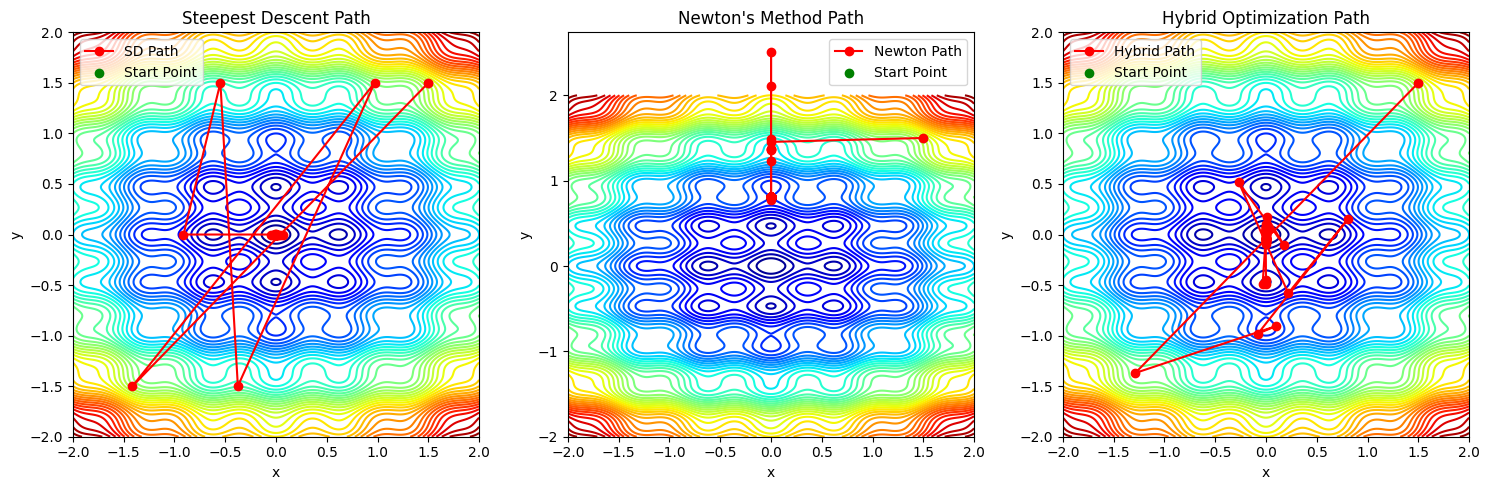

In [102]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.plot(path_sd[:, 0], path_sd[:, 1], 'ro-', label='SD Path')
plt.scatter(x0[0], x0[1], color='green', label='Start Point')
plt.title('Steepest Descent Path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 2)
plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.plot(path_nt[:, 0], path_nt[:, 1], 'ro-', label='Newton Path')
plt.scatter(x0[0], x0[1], color='green', label='Start Point')
plt.title('Newton\'s Method Path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 3)
plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.plot(path_hybrid[:, 0], path_hybrid[:, 1], 'ro-', label='Hybrid Path')
plt.scatter(x0[0], x0[1], color='green', label='Start Point')
plt.title('Hybrid Optimization Path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()
